## importing Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
df = pd.read_csv('Train.csv')

In [115]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [117]:
df.shape

(8523, 10)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Preprocessing

### Droping unessentil features 

In [62]:
df.drop(columns=['Item_Identifier','Outlet_Identifier'], inplace=True)

In [63]:
df.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.3,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [64]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handling missing values

In [65]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [66]:
df['Item_Weight'].isnull().sum()

0

In [67]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [68]:
def fill_random(value):
    if pd.isnull(value):
        return np.random.choice(['Small','Medium'])
    return value

In [69]:
df['Outlet_Size'] = df['Outlet_Size'].apply(fill_random)

In [70]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    4039
Small     3552
High       932
Name: count, dtype: int64

In [71]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## handling Categorical Column

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [73]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [74]:
def convert_values(value):
    if value in ['LF','low fat','Low Fat']:
        return 'Low Fat'
    elif value in ['reg','Regular']:
        return 'Regular'
    

In [75]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(convert_values)

In [77]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [78]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [82]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [81]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

## Handling Numerical Column

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [87]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Outlier Detection

In [99]:
columns = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

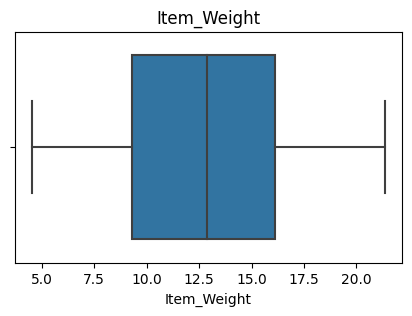

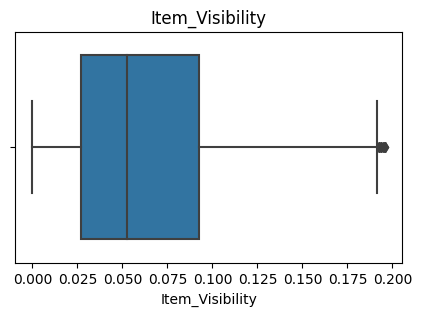

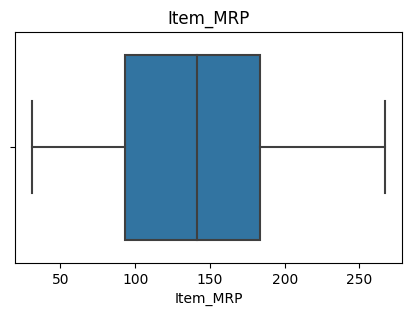

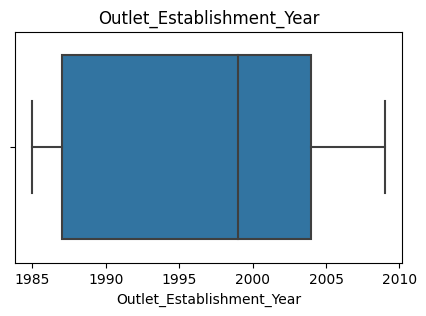

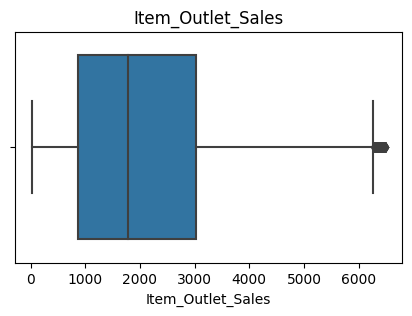

In [126]:
for i in columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()
    print(" ")

In [108]:
df['Item_Visibility'].max()

0.328390948

In [109]:
df['Item_Visibility'].min()

0.0

In [124]:
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Item_Outlet_Sales'] >= lower_bound) & (df['Item_Outlet_Sales'] <= upper_bound)]

## EDA 

### Distribution of numerical column

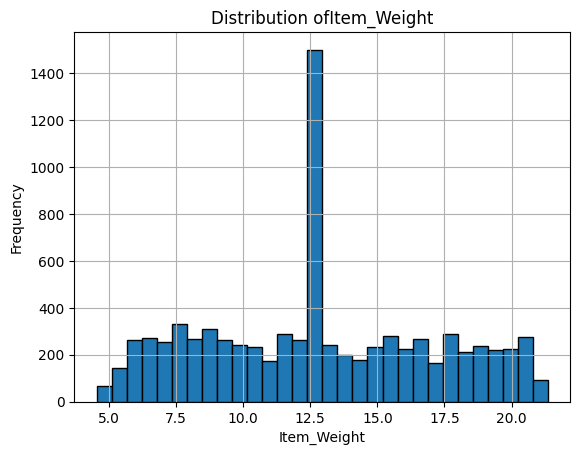

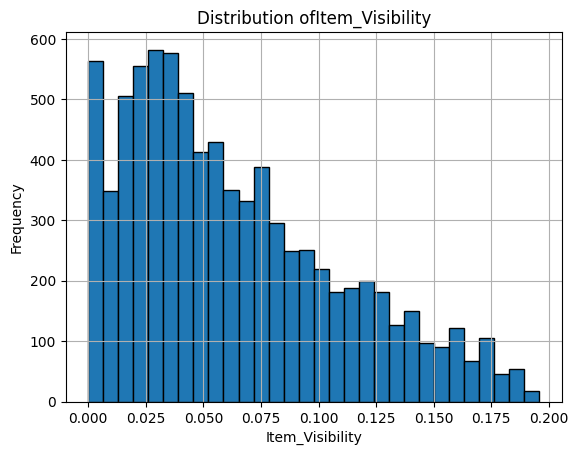

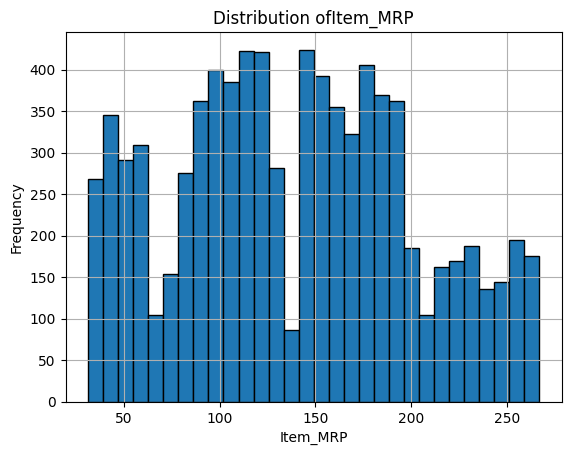

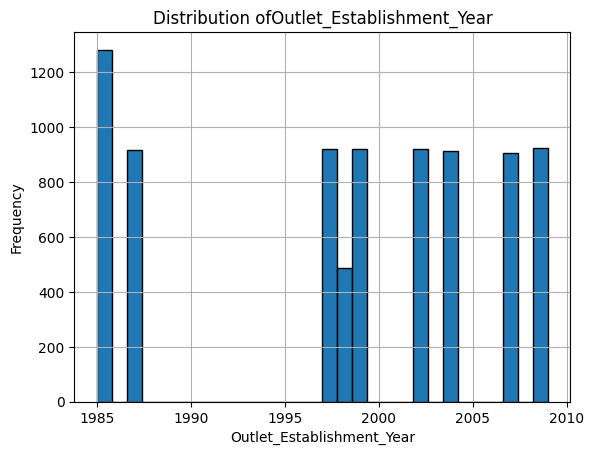

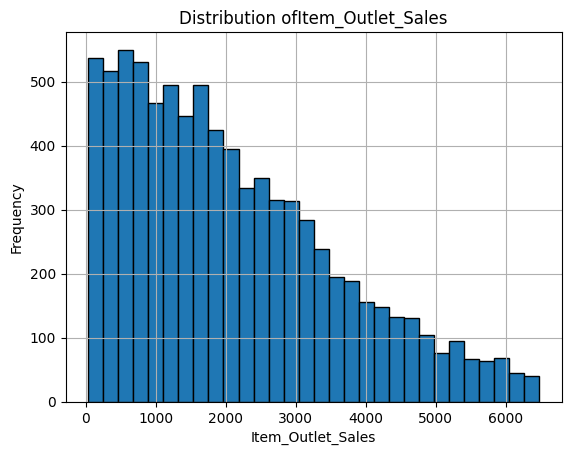

In [131]:
for i in columns:
    df[i].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of{i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()



In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8193 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8193 non-null   float64
 1   Item_Fat_Content           8193 non-null   object 
 2   Item_Visibility            8193 non-null   float64
 3   Item_Type                  8193 non-null   object 
 4   Item_MRP                   8193 non-null   float64
 5   Outlet_Establishment_Year  8193 non-null   int64  
 6   Outlet_Size                8193 non-null   object 
 7   Outlet_Location_Type       8193 non-null   object 
 8   Outlet_Type                8193 non-null   object 
 9   Item_Outlet_Sales          8193 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 704.1+ KB


### Checking corrrelation

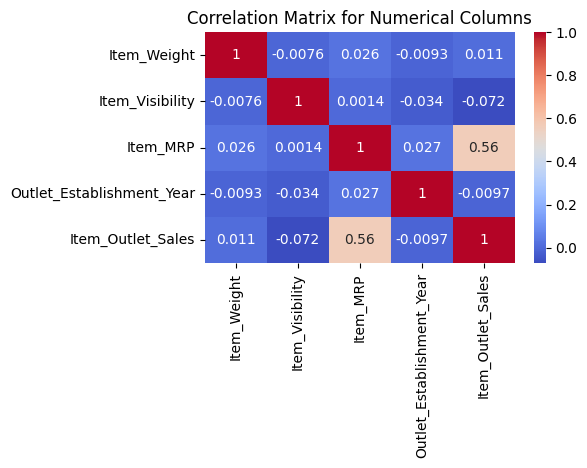

In [136]:
numerical_df = df.select_dtypes(include=['float64','int64'])

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

### EDA of Categorical Column

In [137]:
category_column = df.select_dtypes(include=['object'])

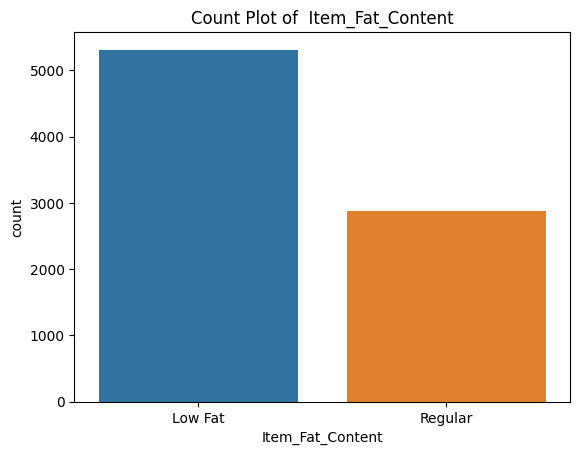

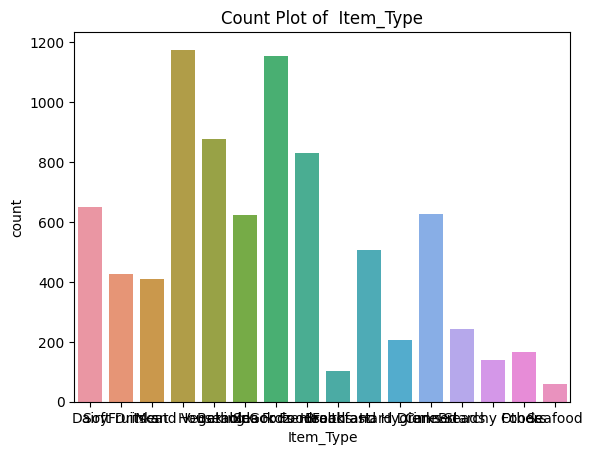

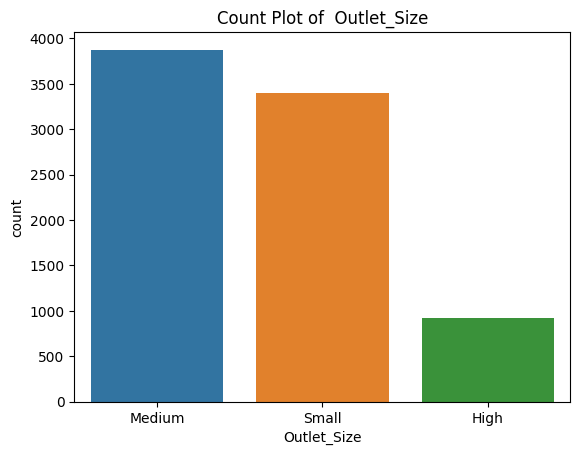

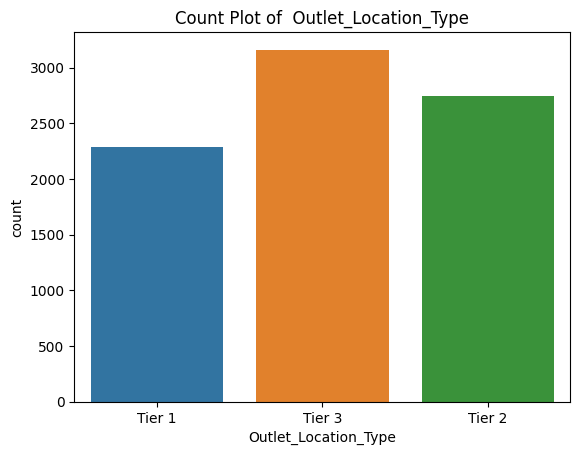

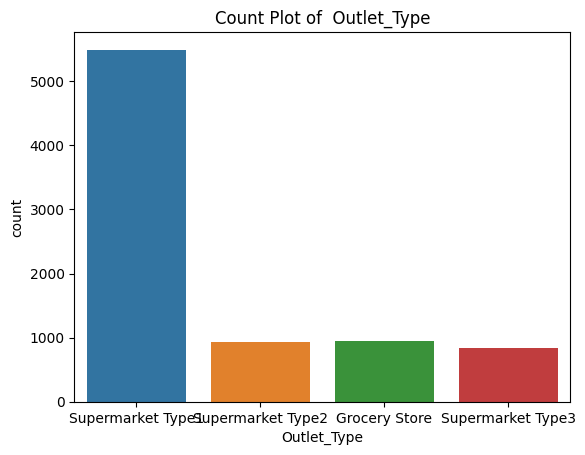

In [142]:
for i in category_column:
    sns.countplot(x=i, data=df)
    plt.title(f'Count Plot of  {i}')
    plt.show()


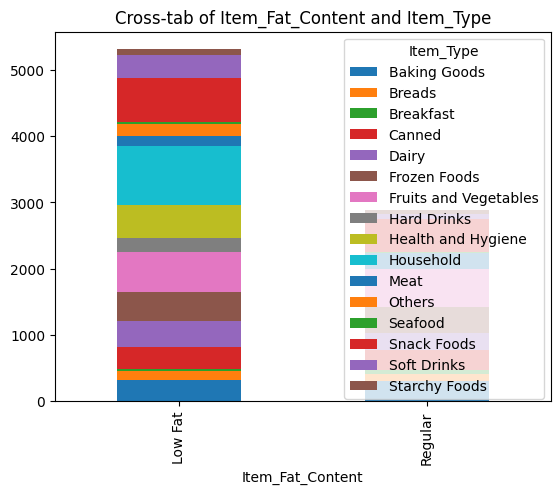

In [144]:
pd.crosstab(df['Item_Fat_Content'], df['Item_Type']).plot(kind='bar', stacked=True)
plt.title('Cross-tab of Item_Fat_Content and Item_Type')
plt.show()



## model Preprocessing encosing categorical variable

### Label Encoding

In [146]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [155]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])

C:\Users\hp\AppData\Local\Temp\ipykernel_13200\2172639372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
C:\Users\hp\AppData\Local\Temp\ipykernel_13200\2172639372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
C:\Users\hp\AppData\Local\Temp\ipykernel_13200\2172639372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [157]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,1999,1,0,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,2009,1,2,Supermarket Type2,443.4228
2,17.50,0,0.016760,Meat,141.6180,1999,1,0,Supermarket Type1,2097.2700
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1998,2,2,Grocery Store,732.3800
4,8.93,0,0.000000,Household,53.8614,1987,0,2,Supermarket Type1,994.7052


## Model Building

In [158]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### OHE 

In [179]:
from sklearn.preprocessing import OneHotEncoder

In [191]:
categorical_columns = ['Item_Type','Outlet_Type']
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)  # sparse=False returns a dense array
# Fit and transform on training data
X_train_cat = ohe.fit_transform(X_train[categorical_columns])
X_test_cat = ohe.transform(X_test[categorical_columns])

In [192]:
print(X_train_cat)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [193]:
# Convert the transformed data into DataFrames
X_train_cat_df = pd.DataFrame(X_train_cat, columns=ohe.get_feature_names_out(categorical_columns))
X_test_cat_df = pd.DataFrame(X_test_cat, columns=ohe.get_feature_names_out(categorical_columns))

In [194]:
# Drop categorical columns from original dataframes
X_train_num = X_train.drop(categorical_columns, axis=1)
X_test_num = X_test.drop(categorical_columns, axis=1)

# Concatenate numerical and encoded categorical columns
X_train_preprocessed = pd.concat([X_train_num.reset_index(drop=True), X_train_cat_df.reset_index(drop=True)], axis=1)
X_test_preprocessed = pd.concat([X_test_num.reset_index(drop=True), X_test_cat_df.reset_index(drop=True)], axis=1)


## applying standard Scaler

In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
sc = StandardScaler()

In [204]:
X_train_scaled = sc.fit_transform(X_train_preprocessed)
X_test_scaled = sc.transform(X_test_preprocessed)

In [232]:
print(X_train_scaled)

[[ 1.38378891 -0.7313649  -1.13776095 ...  0.69701569 -0.35649001
  -0.33123848]
 [ 0.03615703  1.36730653  0.43813481 ...  0.69701569 -0.35649001
  -0.33123848]
 [-1.92435439 -0.7313649   1.66714914 ...  0.69701569 -0.35649001
  -0.33123848]
 ...
 [ 0.78614347  1.36730653  1.40535678 ...  0.69701569 -0.35649001
  -0.33123848]
 [ 1.17285523 -0.7313649  -0.23732197 ...  0.69701569 -0.35649001
  -0.33123848]
 [ 0.00279323  1.36730653 -0.09002461 ... -1.43468793 -0.35649001
  -0.33123848]]


## Model Tranning 

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [207]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [210]:
y_pred = lr.predict(X_test_scaled)

In [215]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [220]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error:',np.sqrt(mse))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 1032.5682602545235
R-squared: 0.5425847030692094


In [221]:
rf = RandomForestRegressor()

In [222]:
rf.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [223]:
y_pred1 = lr.predict(X_test_scaled)

In [224]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred1)
print(f'Mean Squared Error:',np.sqrt(mse))

# Calculate R-squared
r2 = r2_score(y_test, y_pred1)
print(f'R-squared: {r2}')

Mean Squared Error: 1032.5682602545235
R-squared: 0.5425847030692094


## Hyper parameter tunning

In [226]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_scaled, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.538 using {'n_estimators': 1000}
0.501 (0.010) with: {'n_estimators': 10}
0.534 (0.013) with: {'n_estimators': 100}
0.538 (0.011) with: {'n_estimators': 1000}
